<a href="https://colab.research.google.com/github/sakshiharde/Sms_Spam_Classifier/blob/main/Spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
sms_data=pd.read_csv('/content/drive/MyDrive/content/spam.csv',encoding='latin-1')

In [4]:
sms_data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4770,ham,Hi..i got the money da:),NaN,NaN,NaN
2258,ham,Sad story of a Man - Last week was my b'day. M...,NaN,NaN,NaN
4641,spam,You are being ripped off! Get your mobile cont...,NaN,NaN,NaN
2776,ham,Send me your id and password,NaN,NaN,NaN
3720,ham,Blank is Blank. But wat is blank? Lol,NaN,NaN,NaN


In [5]:
sms_data.shape

(5572, 5)

In [6]:
# 1.Data Cleaning
# 2.EDA
# 3.Text Preprocessing
# 4.Model building
# 5.Evaluation
# 6.Improvement
# 7.Website
# 8.Deploy

# 1.Data Cleaning

In [7]:
sms_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
#drop last 3 cols
sms_data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
sms_data.sample(5)

,v1,v2
3208,ham,Havent mus ask if u can 1st wat. Of meet 4 lun...
3610,ham,No. I.ll meet you in the library
2402,ham,Oh oh... Wasted... Den muz chiong on sat n sun...
2514,ham,Ok ill send you with in &lt;DECIMAL&gt; ok.
1631,ham,We not watching movie already. Xy wants 2 shop...


In [10]:
sms_data.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [11]:
sms_data.sample(5)

,target,text
916,ham,Was actually about to send you a reminder toda...
4337,ham,Yes when is the appt again?
4251,ham,"Send ur birthdate with month and year, I will ..."
2003,ham,S....s...india going to draw the series after ...
1707,ham,Was doing my test earlier. I appreciate you. W...


In [12]:
#applying label encoder for ham and spam
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [13]:
sms_data['target']=encoder.fit_transform(sms_data['target'])

In [14]:
sms_data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
#checking missing values
sms_data.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
sms_data.duplicated().sum()

403

In [17]:
sms_data=sms_data.drop_duplicates(keep='first')

In [18]:
sms_data.duplicated().sum()

0

In [19]:
sms_data.shape

(5169, 2)

# 2.Exploratory Data Analysis

In [20]:
sms_data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

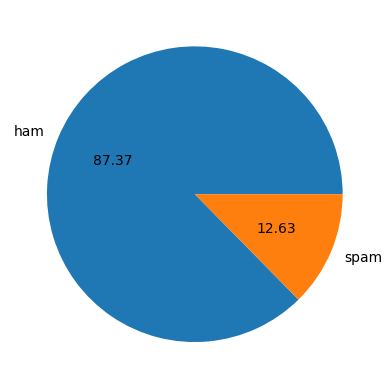

In [21]:
import matplotlib.pyplot as plt
plt.pie(sms_data['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [22]:
#Data is imbalance


In [23]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
#number of characters
sms_data['num_characters']=sms_data['text'].apply(len)

In [25]:
sms_data.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
#number of words
sms_data['num_words']=sms_data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
sms_data.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
sms_data['num_sentences']=sms_data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
sms_data.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
sms_data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
#describing ham messages
sms_data[sms_data['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#describing spam messages
sms_data[sms_data['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [33]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

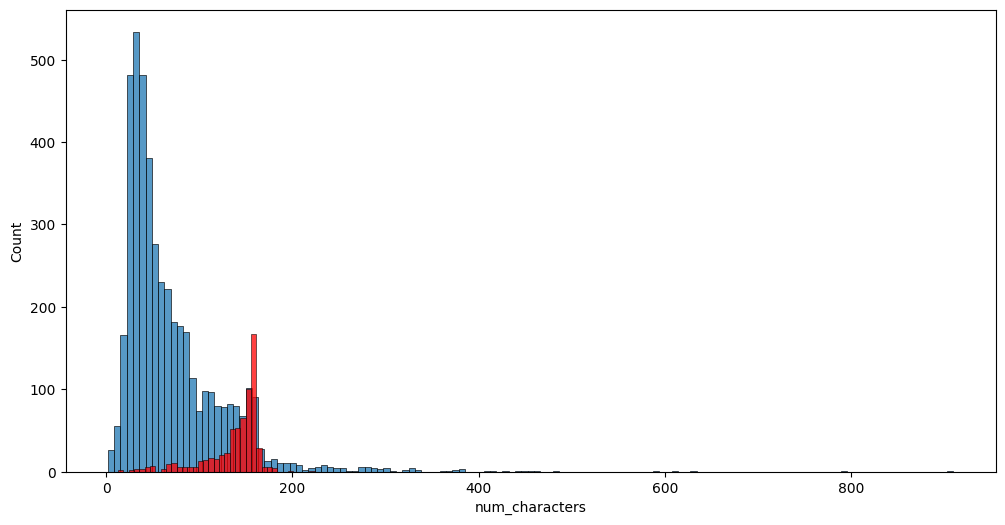

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(sms_data[sms_data['target']==0]['num_characters'])
sns.histplot(sms_data[sms_data['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

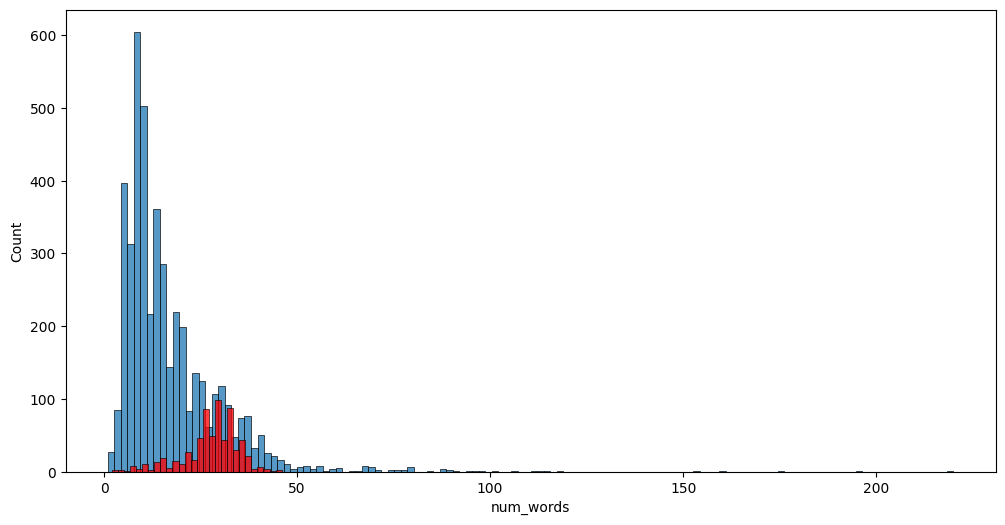

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(sms_data[sms_data['target']==0]['num_words'])
sns.histplot(sms_data[sms_data['target']==1]['num_words'],color='red')

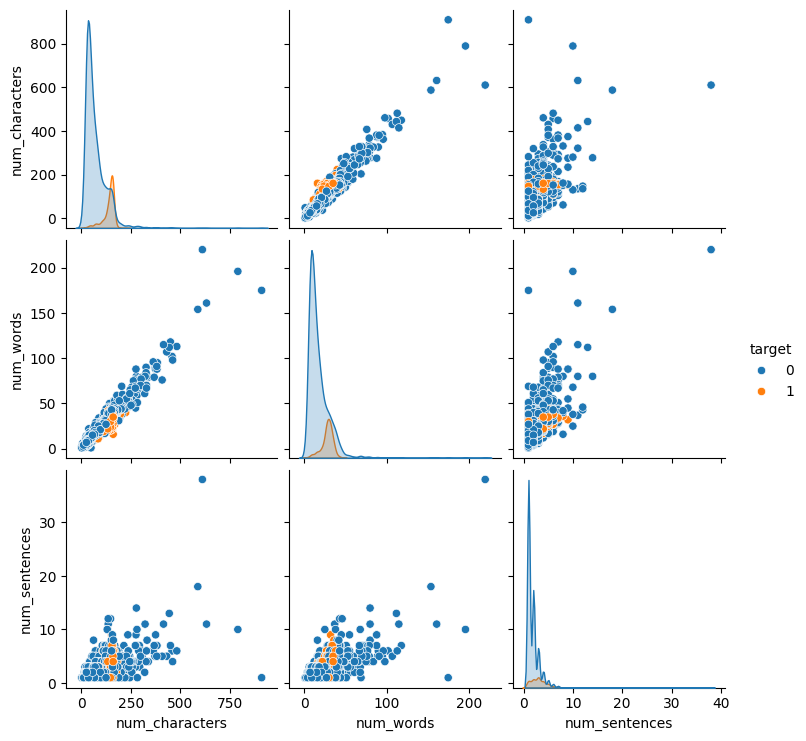

In [36]:
#lets see the relation between the columns num_words,num_characters and num_sentences
sns.pairplot(sms_data,hue='target')

<Axes: >

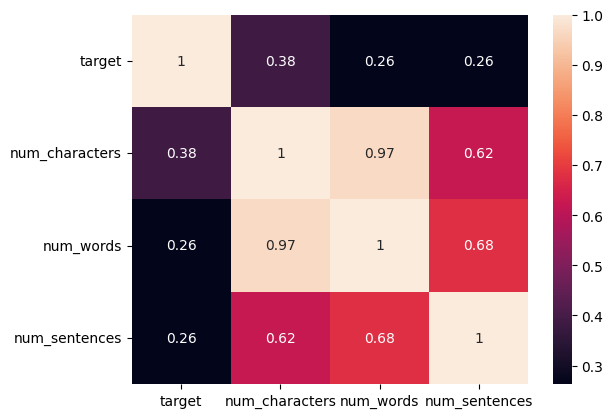

In [37]:
#correlation
sns.heatmap((sms_data[['target','num_characters','num_words','num_sentences']]).corr(),annot=True)

# 3.Data Preprocessing



*   Lower Case

*   Tokenization
*   Removing special characters


*   Removing stop words and punctuation

*   Stemming






In [38]:
# function for lower case and tokenizing the text
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [39]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [40]:
import string

In [45]:
transform_text('Hi how are you sakshi')

'hi sakshi'

In [43]:
sms_data['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [44]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [46]:
sms_data['transformed_text']=sms_data['text'].apply(transform_text)

In [47]:
sms_data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [50]:
spam_wc=wc.generate(sms_data[sms_data['target']==1]['transformed_text'].str.cat(sep=" "))

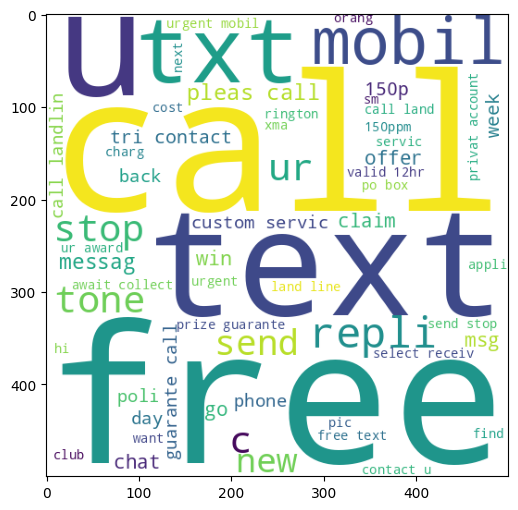

In [52]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [53]:
ham_wc=wc.generate(sms_data[sms_data['target']==0]['transformed_text'].str.cat(sep=" "))

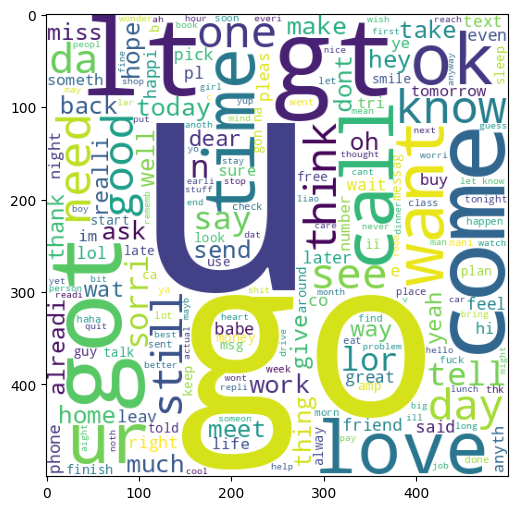

In [54]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [55]:
spam_corpus=[]
for msg in sms_data[sms_data['target']==1]['transformed_text'].tolist():
  for words in msg.split():
    spam_corpus.append(words)

In [56]:
len(spam_corpus)

9939

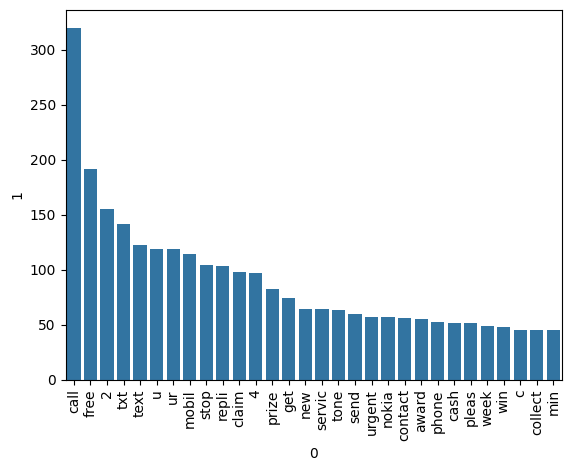

In [57]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [59]:
ham_corpus=[]
for msg in sms_data[sms_data['target']==0]['transformed_text'].tolist():
  for words in msg.split():
    ham_corpus.append(words)

In [60]:
len(ham_corpus)

35404

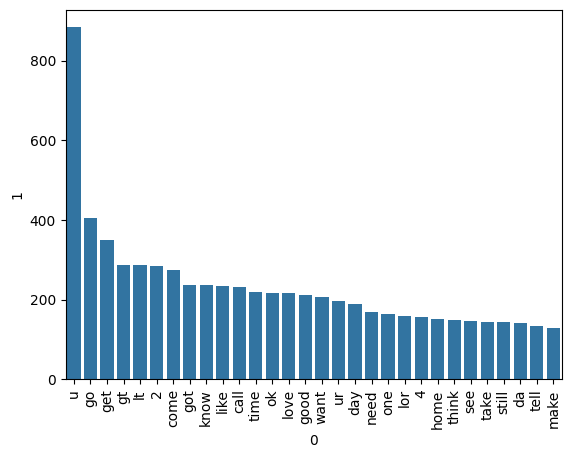

In [61]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4.Model Building

In [ ]:
#using naive bayes algorithm because naive bayes works well on textual data